# Mayo Clinic Urology Department Pediatrics Rotation in Minneapolis 

For two-month stints, residents from the Mayo Clinic Urology Department do a rotation at Children's Minneapolis. In order to arm residents and their families with the best tool for promoting safety (information) I am conducting analyses of criminal activity in and around the location of the temporary residence (Murals at LynLake). The apartment, which is rented by the Urology Department, provides enough space for a small family and allows pets (with a per-pet fee paid by the resident). One heated garage parking spot is included; additional parking spots may be rented. 

In [1]:
# Load packages
# Data Analysis and Visulaization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# Seasonal Decomposition & Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:

# Load data
df = pd.read_csv("Crime_Data.csv",low_memory=False,index_col="OBJECTID",parse_dates=['Reported_Date','Occurred_Date'])
# Display overall data structure
display(df.head(20))

df['Offense_Category']=df['Offense_Category'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
# df['Occurred_Date'] = pd.to_datetime(df['Occurred_Date'])

display(df.info())


,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Problem_Final,Address,Precinct,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,-93.315904,44.996096,Additional Crime Metrics,19-001979,MP20191979,2019-01-03 00:09:00+00:00,2019-01-02 21:55:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0016XX VINCENT AVE N,4.0,Willard - Hay,5.0,44.99610,-93.31590,-1.038788e+07,5.620907e+06,1
2,-93.310826,45.021371,Additional Crime Metrics,19-016104,MP201916104,2019-01-17 03:03:00+00:00,2019-01-17 02:36:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic with Weapons (P),0036XX RUSSELL AVE N,4.0,Cleveland,4.0,45.02137,-93.31083,-1.038731e+07,5.624887e+06,1
3,-93.313518,45.049415,Additional Crime Metrics,19-026241,MP201926241,2019-01-27 19:50:00+00:00,2019-01-27 18:17:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Stabbing (PE),0025XX 52ND AVE N,4.0,Shingle Creek,4.0,45.04941,-93.31352,-1.038761e+07,5.629304e+06,1
4,-93.306123,44.896520,Additional Crime Metrics,19-032882,MP201932882,2019-02-03 18:03:00+00:00,2019-02-03 17:00:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0059XX NEWTON AVE S,5.0,Armatage,13.0,44.89652,-93.30612,-1.038679e+07,5.605245e+06,1
5,-93.241592,45.025836,Additional Crime Metrics,19-036236,MP201936236,2019-02-07 03:15:00+00:00,2019-02-06 22:00:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic with Weapons (P),0012XX 32ND AVE NE,2.0,Waite Park,1.0,45.02584,-93.24159,-1.037961e+07,5.625590e+06,1
6,-93.264536,44.944730,Additional Crime Metrics,19-045570,MP201945570,2019-02-16 01:49:00+00:00,2019-02-16 00:45:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Assault in Progress (P),0007XX 32ND ST E,3.0,Central,9.0,44.94473,-93.26454,-1.038216e+07,5.612825e+06,1
7,-93.301181,45.029455,Additional Crime Metrics,19-058764,MP201958764,2019-03-01 06:23:00+00:00,2019-03-01 05:00:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Burglary Dwlng In Progress (P),0017XX 41ST AVE N,4.0,Webber - Camden,4.0,45.02946,-93.30118,-1.038624e+07,5.626160e+06,1
8,-93.273381,44.960900,Additional Crime Metrics,19-066854,MP201966854,2019-03-09 03:02:00+00:00,2019-03-08 21:43:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0002XX 22ND ST E,5.0,Whittier,10.0,44.96090,-93.27338,-1.038315e+07,5.615368e+06,1
9,-93.275367,44.950150,Additional Crime Metrics,19-081415,MP201981415,2019-03-22 14:24:00+00:00,2019-03-18 12:00:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse Report Only (P),0029XX STEVENS AVE,5.0,Whittier,10.0,44.95015,-93.27537,-1.038337e+07,5.613677e+06,1


<class 'pandas.core.frame.DataFrame'>
Index: 258765 entries, 1 to 258765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   X                    258765 non-null  float64            
 1   Y                    258765 non-null  float64            
 2   Type                 258765 non-null  object             
 3   Case_Number          258765 non-null  object             
 4   Case_NumberAlt       223201 non-null  object             
 5   Reported_Date        258765 non-null  datetime64[ns, UTC]
 6   Occurred_Date        258764 non-null  datetime64[ns, UTC]
 7   NIBRS_Crime_Against  258765 non-null  object             
 8   NIBRS_Group          258765 non-null  object             
 9   NIBRS_Code           258765 non-null  object             
 10  Offense_Category     258765 non-null  category           
 11  Offense              258765 non-null  object             
 12  Problem

None

In [3]:
# Checking for missing values in crucial columns
missing_values = df.isnull().sum()
# Check for duplicates 
duplicated_values = df.duplicated()
# If the Offense_Category, 
print(missing_values)
df_clean = df.dropna(axis=0,subset=['Neighborhood','Occurred_Date'])
df_clean.info()

df_clean = df_clean[df_clean['Occurred_Date'] < '2023-12-01']

X                          0
Y                          0
Type                       0
Case_Number                0
Case_NumberAlt         35564
Reported_Date              0
Occurred_Date              1
NIBRS_Crime_Against        0
NIBRS_Group                0
NIBRS_Code                 0
Offense_Category           0
Offense                    0
Problem_Initial        49204
Problem_Final          49204
Address                   68
Precinct                1625
Neighborhood            1704
Ward                    1844
Latitude                   0
Longitude                  0
wgsXAnon                   0
wgsYAnon                   0
Crime_Count                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 257060 entries, 1 to 258765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   X                    257060 non-null  float64            
 1   Y                   

In [40]:
from msp_crime_functions import haversine, apply_text_fixes
# Center point coordinates: The Murals of LynLake
center_lat, center_lon = 44.951130601589234, -93.28785887942821
# calculate distance
df_hs = df_clean
df_hs['distance'] = df_hs.apply(lambda x: haversine(center_lat, center_lon, x['Latitude'], x['Longitude']), axis=1)
# Filter for crimes within a 2 km radius
df_hs = df_hs[df_hs['distance'] <= 1.6]
# Mappings for fixes
text_fix_map = {' Offenses':'',
                'Destruction/Damage/Vandalism of Property':'Destruction of Property',
                'Burglary/Breaking & Entering':'Burglary',
                'Larceny/Theft':'Larceny'
                }
# Apply the text fixes to the 'Offense_Category' column
df_hs['Offense_Category'] = df_hs['Offense_Category'].str.strip().apply(lambda x: apply_text_fixes(x, text_fix_map))
# Make Offense_Category a categorical
df_hs['Offense_Category'] = pd.Categorical(df_hs['Offense_Category'])

# Display the result
# display(df_radius.info())
display(df_hs.info())
print(df_hs['Offense_Category'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 32880 entries, 8 to 258758
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    32880 non-null  float64            
 1   Y                    32880 non-null  float64            
 2   Type                 32880 non-null  object             
 3   Case_Number          32880 non-null  object             
 4   Case_NumberAlt       30623 non-null  object             
 5   Reported_Date        32880 non-null  datetime64[ns, UTC]
 6   Occurred_Date        32880 non-null  datetime64[ns, UTC]
 7   NIBRS_Crime_Against  32880 non-null  object             
 8   NIBRS_Group          32880 non-null  object             
 9   NIBRS_Code           32880 non-null  object             
 10  Offense_Category     32880 non-null  category           
 11  Offense              32880 non-null  object             
 12  Problem_Initial      2

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/2761340287.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/2761340287.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



None

['Subset of NIBRS Assault', 'Larceny', 'Burglary', 'Assault', 'Fraud', ..., 'Extortion/Blackmail', 'Gunshot Wound Victims', 'Shots Fired Calls', 'Prostitution', 'Subset of NIBRS Robbery']
Length: 25
Categories (25, object): ['Animal Cruelty', 'Arson', 'Assault', 'Burglary', ..., 'Stolen Property', 'Subset of NIBRS Assault', 'Subset of NIBRS Robbery', 'Weapon Law Violations']


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/2734762835.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/2734762835.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/2734762835.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(0.0, 10568.8)

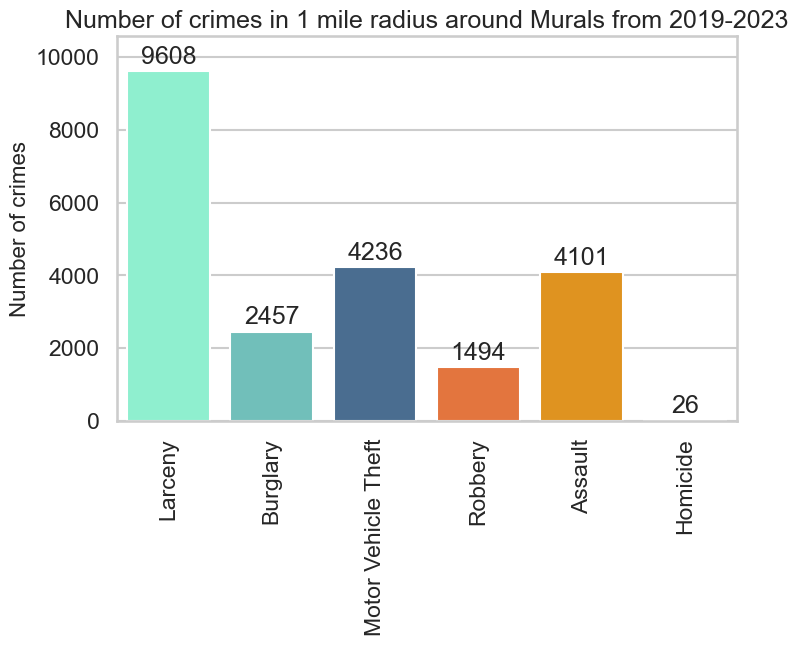

In [41]:
offense_types_to_analyze = ["Larceny","Burglary","Motor Vehicle Theft","Robbery","Assault","Homicide"]
violent_offenses = ["Robbery","Assault","Homicide"]
nonviolent_offenses = [offense for offense in offense_types_to_analyze if offense not in violent_offenses]
# Subset based on the categories to analyze
df_hs_subset = df_hs[df_hs['Offense_Category'].isin(offense_types_to_analyze)]
# Remove unused categories
df_hs_subset['Offense_Category'] = df_hs_subset['Offense_Category'].cat.remove_unused_categories()
# Reset 'Offense_Category' as a categorical column
df_hs_subset['Offense_Category'] = pd.Categorical(df_hs_subset['Offense_Category'], categories=offense_types_to_analyze, ordered=True)
 
# Define Boolean for violent vs not crimes
df_hs_subset['ViolentCrimeBool'] = df_hs_subset['Offense_Category'].isin(violent_offenses).astype(int)
df_hs_subset.assign(ViolentCrime = df_hs_subset.ViolentCrimeBool.map({0:'Non-Violent',1:'Violent'}))
# define custom color palette
custom_color_dict = {
                    "Larceny":"#7FFFD4",
                    "Burglary":"#64CCC5",
                    "Robbery":"#FF6C22",
                    "Motor Vehicle Theft":"#3E6D9C",
                    "Assault":"#ff9a00",
                    "Homicide":"#111111"
                    }
# "#2B3499","#87C4FF","#D71313",
# countplot for overall crimes
fs_axis = 16
plt.close()
fig = plt.subplots(figsize=(8,5))
sns.set_context('talk')
sns.set_style('white')
ax = sns.countplot(data=df_hs_subset,x="Offense_Category",palette=custom_color_dict)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel(None)
ax.set_ylabel("Number of crimes",fontsize=fs_axis)
ax.set_title("Number of crimes in 1 mile radius around Murals from 2019-2023",fontsize=fs_axis+2)
max_height = 0 # initialize variable
for p in ax.patches:
    height = p.get_height()  # Get the current bar's height
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
    # update max height if current height > max_height
    if max_height < height:
        max_height = height

ax.set_ylim(top = max_height + max_height*.1)


# Crime Over Time

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/1778000262.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



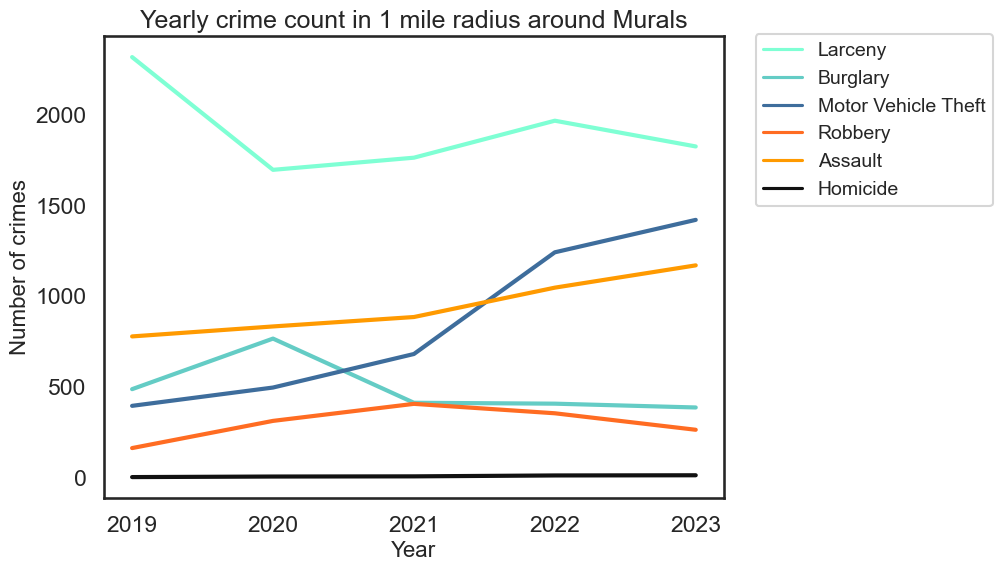

In [42]:
# Extract the year from 'Occurred_Date'
df_hs_subset['Year'] = df_hs_subset['Occurred_Date'].dt.year
# Filter the DataFrame to include only the years 2019 to 2023
df_hs_subset = df_hs_subset[df_hs_subset['Year'].isin(range(2019, 2024))]
# Group by 'Year' and 'Offense_Category' and sum the 'Crime_Count'
yearly_sum = df_hs_subset.groupby(['Year', 'Offense_Category'])['Crime_Count'].sum().reset_index()

fig, ax = plt.subplots(figsize = (8,6))

sns.lineplot(data=yearly_sum, x='Year', y='Crime_Count', hue='Offense_Category',linewidth=3,palette=custom_color_dict)

# Set x-ticks to only whole years
ax.set_xticks(range(2019, 2024))

# Set title and labels
fs_axis = 16
ax.set_title("Yearly crime count in 1 mile radius around Murals",fontsize=fs_axis+2)
ax.set_xlabel("Year",fontsize=fs_axis)
ax.set_ylabel("Number of crimes",fontsize=fs_axis)
# Adjust legen
plt.legend(loc="upper right",fontsize=fs_axis)
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.45,1.025),fontsize=fs_axis-2)
plt.show()


In [43]:
correlation_dict = {}

# Loop through each category and perform regression
for category in offense_types_to_analyze:
    # Filter data for the current category
    category_data = yearly_sum[yearly_sum['Offense_Category'] == category]
    aggregated_data = category_data.groupby('Year')['Crime_Count'].sum().reset_index()
    # Calculate the Pearson correlation coefficient
    correlation_crimevsyear = aggregated_data['Year'].corr(aggregated_data['Crime_Count'])
    correlation_dict[category]=correlation_crimevsyear
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Offense_Category', 'Correlation'])
correlation_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Offense_Category,Correlation
0,Larceny,-0.457478
1,Burglary,-0.561109
2,Motor Vehicle Theft,0.965079
3,Robbery,0.414171
4,Assault,0.973794
5,Homicide,0.977140


Correlation analysis indicates that motor vehicle theft, assault, and homicide have all been increasing in the last few years, although the numbers of homicide are  low (26 from 2019 to 2023). These data indicate that homicide is not a major risk in this area. Motor vehicle theft and assault may be increasing, however.  



# When is crime most likely?

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/3546551003.py:75: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0.0, '0%'),
 Text(0, 0.01, '1%'),
 Text(0, 0.02, '2%'),
 Text(0, 0.03, '3%'),
 Text(0, 0.04, '4%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.06, '6%'),
 Text(0, 0.07, '7%'),
 Text(0, 0.08, '8%')]

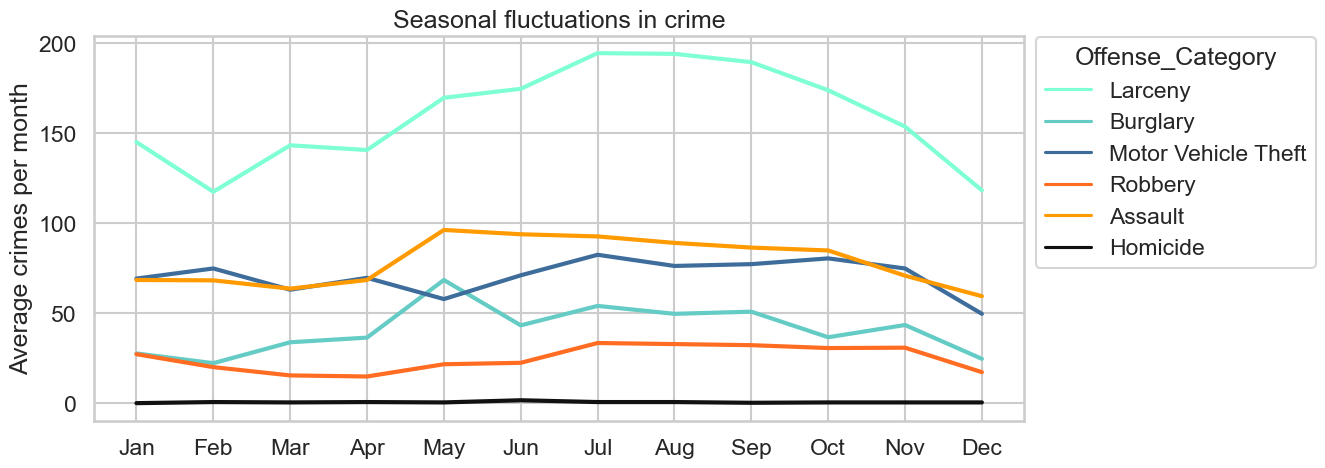

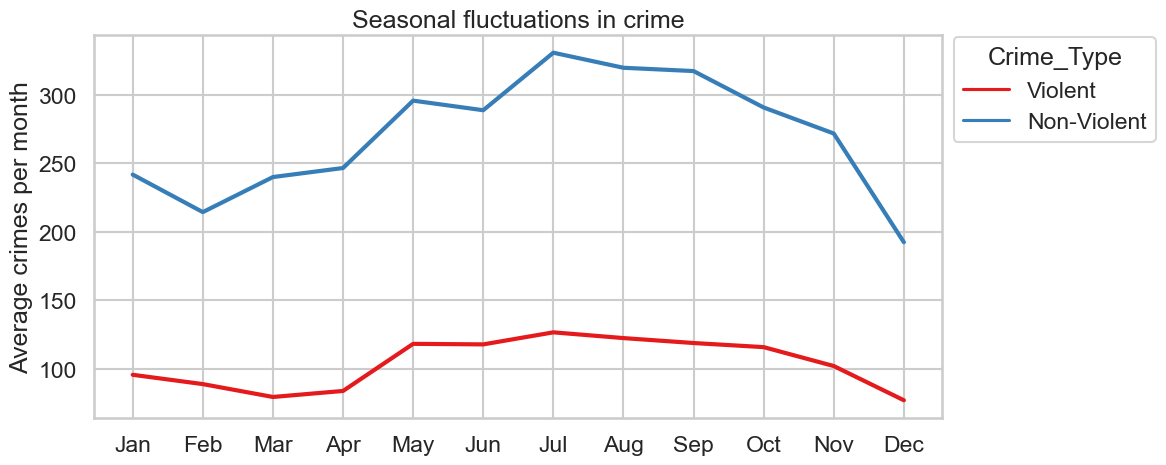

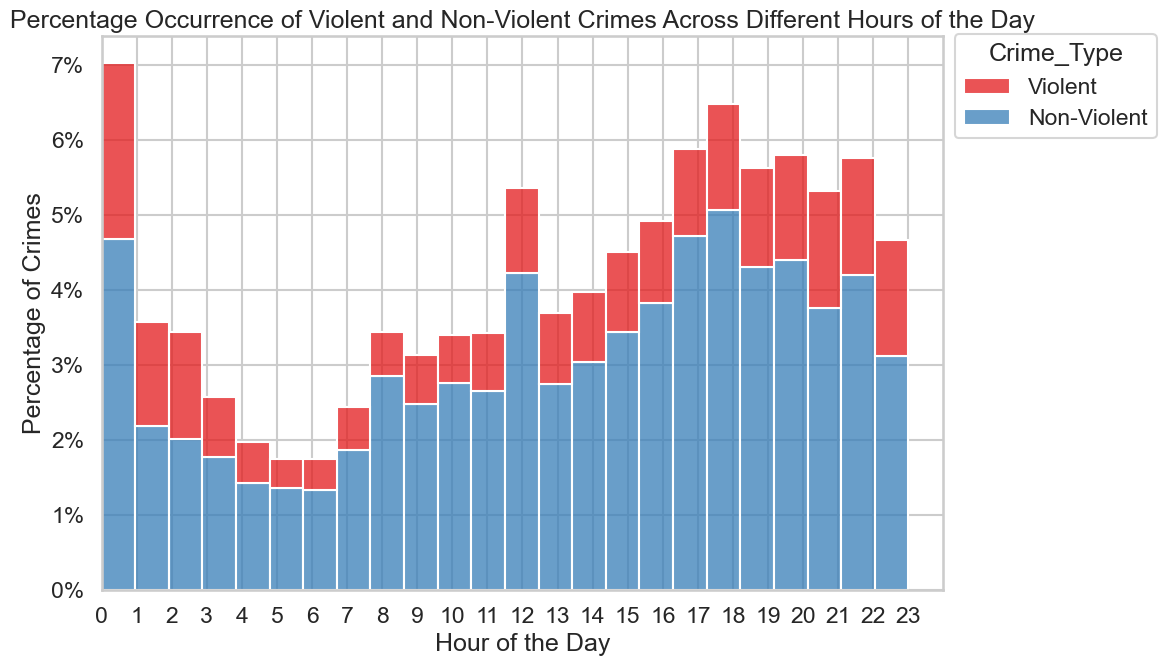

In [44]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Extract month and time info from data. Do seasonal fluctuations in crime matter for this area?
df_hs_subset['Month'] = df_hs_subset['Occurred_Date'].dt.month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_hs_subset['Month_Name'] = pd.Categorical(df_hs_subset['Occurred_Date'].dt.strftime('%b'),categories=months,ordered=True)
df_hs_subset['Hour'] = df_hs_subset['Occurred_Date'].dt.hour
df_hs_subset['Occurred_Date'] = pd.to_datetime(df_hs_subset['Occurred_Date'], format='%Y/%m/%d %H:%M:%S+%f', errors='coerce')

# sort by Occurred Date
df_hs_subset = df_hs_subset.sort_values(by='Occurred_Date')

monthly_sum = df_hs_subset.groupby(['Month_Name','Year','Offense_Category'])['Crime_Count'].sum().reset_index()
monthly_avg_2019to2023 = monthly_sum.groupby(['Month_Name','Offense_Category'])['Crime_Count'].mean().reset_index()
# Monthly crime across categories
fig1, ax1 = plt.subplots(figsize=(12,5))
sns.lineplot(
    data=monthly_avg_2019to2023,
    x="Month_Name",
    y='Crime_Count',
    hue='Offense_Category',
    ax=ax1,
    palette=custom_color_dict,
    linewidth=3
)
plt.xlabel(None)
plt.ylabel('Average crimes per month')
plt.title('Seasonal fluctuations in crime')
sns.move_legend(ax1,"upper left",bbox_to_anchor=(1,1.025))
# plt.legend(labels=monthly_avg_2019to2023['Offense_Category'].unique(),loc='upper left',bbox_to_anchor=(1,1.05))

# Monthly crime across violent and non-violent crimes
df_hs_subset['Crime_Type'] = df_hs_subset['ViolentCrimeBool'].map({1:"Violent", 0:"Non-Violent"})
df_hs_subset['Crime_Type'] = pd.Categorical(df_hs_subset['Crime_Type'],categories=['Violent','Non-Violent'],ordered=True)
monthly_sum_vnv = df_hs_subset.groupby(['Month_Name','Year','Crime_Type'])['Crime_Count'].sum().reset_index()
monthly_avg_vnv_2019to2023 = monthly_sum_vnv.groupby(['Month_Name','Crime_Type'])['Crime_Count'].mean().reset_index()

fig2,ax2 = plt.subplots(figsize=(12,5))
sns.lineplot(
    data=monthly_avg_vnv_2019to2023,
    x="Month_Name",
    y='Crime_Count',
    hue='Crime_Type',
    ax=ax2,
    palette="Set1",
    linewidth=3
)

plt.xlabel(None)
plt.ylabel('Average crimes per month')
plt.title('Seasonal fluctuations in crime')
sns.move_legend(ax2,"upper left",bbox_to_anchor=(1,1.025))
plt.tight_layout()

# Which hours are the most dangerous?
# Create a histogram
fig3 = plt.figure(figsize=(12, 7))
ax3 = sns.histplot(data=df_hs_subset, x='Hour', stat='probability', hue='Crime_Type', multiple='stack', bins=24, palette='Set1')

# Customizing the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Crimes')
plt.title('Percentage Occurrence of Violent and Non-Violent Crimes Across Different Hours of the Day')
plt.xticks(range(0, 24))
plt.xlim(0, 24)

# Placing legend outside the plot

sns.move_legend(ax3,"upper left",bbox_to_anchor=(1,1.025))
plt.tight_layout()  # Adjusts the plot to fit into the figure area.

# Convert y-axis labels to percentages
ax3.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax3.get_yticks()])



Summer months and the afternoon through the evening are the most preferred times for criminal activity of both violent and non-violent types. This matches what we see in most cities across the country. 

# Violent and Non-Violent Crime Heatmap

In [45]:
import folium
from folium.plugins import HeatMap
from folium.features import RegularPolygonMarker

work_lat = 44.956275462246786
work_lon=-93.26137407442644

# Sample data for both categories
df_violent = df_hs_subset[df_hs_subset['Crime_Type'] == 'Violent'].sample(n=1000, random_state=1)
df_non_violent = df_hs_subset[df_hs_subset['Crime_Type'] == 'Non-Violent'].sample(n=1000, random_state=1)

# Create a base map
map_crime_heatmap = folium.Map(location=[center_lat, center_lon], zoom_start=13.5)

# Create lists of coordinates for each category
locations_violent = df_violent[['Latitude', 'Longitude']].values.tolist()
locations_non_violent = df_non_violent[['Latitude', 'Longitude']].values.tolist()

# Create and add HeatMap layers
HeatMap(locations_violent, radius=15, max_zoom=10, gradient={0.3: 'pink', 0.6: 'red', .9: 'darkred'}).add_to(map_crime_heatmap)
HeatMap(locations_non_violent, radius=15, max_zoom=10, gradient={0.3: 'lightblue', 0.6: 'blue', 0.9: 'darkblue'}).add_to(map_crime_heatmap)

# Add a house marker for the Murals location
folium.Marker(
    location=[center_lat, center_lon],
    icon=folium.Icon(color='green',icon='home'),
    popup='Murals at LynLake'
).add_to(map_crime_heatmap)

# Add a marker for the Murals location
folium.Marker(
    location=[work_lat, work_lon],
    icon=folium.Icon(color='red',icon='plus'),
    popup="Children's Minnesota"
).add_to(map_crime_heatmap)
# Display the map
map_crime_heatmap

The heatmap shows the location of Murals and associated hotspots of violent (red) and non-violent (blue) criminal activity (areas with both are purple). The intensity of the hotspot reflects the prevelance of crime. 

Taken together, the analyses performed above suggest that although crime is always the perpetrator's and never the victim's fault, it is prudent to be alert and aware of your surroundings especially in the afternoons and evenings.

The Murals at LynLake offers a parking spot to the primary dweller, and additional spots can be rented for $150/month (in 2023). My analyses indicate that that street parking should be avoided and a secondary parking spot should be rented if the resident and cohabitants have a second car.

Next, let's look at the trends in crime over the last few years and make projections.

In [46]:
# MSP Weather
msp_weather_2010_2019 = pd.read_csv("MSPWeather_2010_2019.csv",parse_dates=['Date'])
msp_weather_2020_CURR = pd.read_csv("MSPWeather_2020_CURR.csv",parse_dates=['Date'])
msp_weather = pd.concat([msp_weather_2010_2019,msp_weather_2020_CURR]) # concatenate 2010-2019 and 2020-curr data
msp_weather = msp_weather[msp_weather['Date'].dt.year > 2018] # Subset for 2019 onwards (same as our crime data)

colmapping = {'Maximum Temperature degrees (F)':'Max Temp (F)', 'Minimum Temperature degrees (F)':'Min Temp (F)'}
msp_weather.rename(columns=colmapping,inplace=True)
# Convert 'Occurred_Date' to timezone-aware UTC
df_hs_subset['Occurred_Date'] = df_hs_subset['Occurred_Date'].dt.tz_convert('UTC')
df_hs_subset['Occurred_Date_norm'] = df_hs_subset['Occurred_Date'].dt.normalize()
# Make 'Date' column in the weather data timezone-aware UTC
msp_weather['Date'] = msp_weather['Date'].dt.tz_localize('UTC', ambiguous='infer')

df_hs_subset_wthr = pd.merge(left=df_hs_subset,right=msp_weather,how='left',left_on='Occurred_Date_norm',right_on='Date')

display(df_hs_subset_wthr.sample(20))
df_hs_subset_wthr.drop(['X','Y','Date'],axis=1)
# Check for missing values after the merge
# print(df_hs_subset_wthr.isnull().sum())

,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Month_Name,Hour,Crime_Type,Occurred_Date_norm,Date,Max Temp (F),Min Temp (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
2900,-93.282964,44.954639,Crime Offenses (NIBRS),19-705857,MP2019705857,2019-09-17 14:20:00+00:00,2019-09-16 18:30:00+00:00,Property,Group A,23H,...,Sep,18,Non-Violent,2019-09-16 00:00:00+00:00,2019-09-16 00:00:00+00:00,87.0,63.0,0.00,0.00,0.00
5315,-93.272225,44.948354,Crime Offenses (NIBRS),20-123604,MP2020123604,2020-05-09 17:19:00+00:00,2020-05-09 13:30:00+00:00,Property,Group A,23G,...,May,13,Non-Violent,2020-05-09 00:00:00+00:00,2020-05-09 00:00:00+00:00,60.0,34.0,0.15,0.00,0.00
10580,-93.289411,44.945673,Crime Offenses (NIBRS),21-707037,MP2021707037,2021-09-07 12:40:00+00:00,2021-09-06 17:30:00+00:00,Property,Group A,23H,...,Sep,17,Non-Violent,2021-09-06 00:00:00+00:00,2021-09-06 00:00:00+00:00,81.0,56.0,0.00,0.00,0.00
3981,-93.271493,44.956428,Crime Offenses (NIBRS),19-374924,MP2019374924,2019-12-24 00:21:00+00:00,2019-12-23 09:00:00+00:00,Property,Group A,23H,...,Dec,9,Non-Violent,2019-12-23 00:00:00+00:00,2019-12-23 00:00:00+00:00,39.0,22.0,0.00,0.00,6.00
7632,-93.280514,44.942930,Crime Offenses (NIBRS),20-290139,MP2020290139,2020-11-16 03:38:00+00:00,2020-11-16 02:17:00+00:00,Person,Group A,13A,...,Nov,2,Violent,2020-11-16 00:00:00+00:00,2020-11-16 00:00:00+00:00,41.0,24.0,T,T,1.00
1321,-93.280431,44.960903,Crime Offenses (NIBRS),19-702864,MP2019702864,2019-05-29 19:21:00+00:00,2019-05-25 14:40:00+00:00,Property,Group A,23H,...,May,14,Non-Violent,2019-05-25 00:00:00+00:00,2019-05-25 00:00:00+00:00,69.0,54.0,0.00,0.00,0.00
7784,-93.277851,44.958236,Crime Offenses (NIBRS),20-302448,MP2020302448,2020-12-03 16:29:00+00:00,2020-12-03 12:00:00+00:00,Property,Group A,240,...,Dec,12,Non-Violent,2020-12-03 00:00:00+00:00,2020-12-03 00:00:00+00:00,41.0,26.0,0.00,0.00,0.00
4654,-93.297562,44.959132,Crime Offenses (NIBRS),20-087435,MP202087435,2020-04-03 15:59:00+00:00,2020-03-04 00:00:00+00:00,Property,Group A,23G,...,Mar,0,Non-Violent,2020-03-04 00:00:00+00:00,2020-03-04 00:00:00+00:00,42.0,24.0,T,0.00,T
2610,-93.288079,44.950999,Crime Offenses (NIBRS),19-261025,MP2019261025,2019-08-30 08:51:00+00:00,2019-08-28 18:00:00+00:00,Property,Group A,220,...,Aug,18,Non-Violent,2019-08-28 00:00:00+00:00,2019-08-28 00:00:00+00:00,74.0,57.0,0.00,0.00,0.00
4786,-93.301417,44.956818,Crime Offenses (NIBRS),20-068678,MP202068678,2020-03-14 13:53:00+00:00,2020-03-14 12:00:00+00:00,Property,Group A,23F,...,Mar,12,Non-Violent,2020-03-14 00:00:00+00:00,2020-03-14 00:00:00+00:00,35.0,23.0,0.00,0.00,0.00


,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,Offense_Category,Offense,...,Month,Month_Name,Hour,Crime_Type,Occurred_Date_norm,Max Temp (F),Min Temp (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,Crime Offenses (NIBRS),19-024277,MP201924277,2019-01-25 19:46:00+00:00,2019-01-01 00:00:00+00:00,Property,Group A,23H,Larceny,All Other Larceny,...,1,Jan,0,Non-Violent,2019-01-01 00:00:00+00:00,11.0,0.0,0.00,0.00,T
1,Crime Offenses (NIBRS),19-700024,MP2019700024,2019-01-02 13:22:00+00:00,2019-01-01 00:30:00+00:00,Property,Group A,23H,Larceny,All Other Larceny,...,1,Jan,0,Non-Violent,2019-01-01 00:00:00+00:00,11.0,0.0,0.00,0.00,T
2,Crime Offenses (NIBRS),19-000275,MP2019275,2019-01-01 07:53:00+00:00,2019-01-01 01:30:00+00:00,Property,Group A,23H,Larceny,All Other Larceny,...,1,Jan,1,Non-Violent,2019-01-01 00:00:00+00:00,11.0,0.0,0.00,0.00,T
3,Crime Offenses (NIBRS),19-000275,MP2019275,2019-01-01 07:53:00+00:00,2019-01-01 01:30:00+00:00,Person,Group A,13C,Assault,Intimidation,...,1,Jan,1,Violent,2019-01-01 00:00:00+00:00,11.0,0.0,0.00,0.00,T
4,Crime Offenses (NIBRS),19-000237,MP2019237,2019-01-01 02:15:00+00:00,2019-01-01 02:15:00+00:00,Person,Group A,13B,Assault,Simple Assault,...,1,Jan,2,Violent,2019-01-01 00:00:00+00:00,11.0,0.0,0.00,0.00,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21852,Crime Offenses (NIBRS),23-319931,MP2023319931,2023-12-01 13:27:00+00:00,2023-11-30 10:15:00+00:00,Person,Group A,13B,Assault,Simple Assault,...,11,Nov,10,Violent,2023-11-30 00:00:00+00:00,42.0,24.0,0.00,0.00,0.00
21853,Crime Offenses (NIBRS),23-318854,MP2023318854,2023-11-30 10:54:00+00:00,2023-11-30 10:54:00+00:00,Person,Group A,13B,Assault,Simple Assault,...,11,Nov,10,Violent,2023-11-30 00:00:00+00:00,42.0,24.0,0.00,0.00,0.00
21854,Crime Offenses (NIBRS),23-319242,MP2023319242,2023-11-30 18:13:00+00:00,2023-11-30 17:31:00+00:00,Person,Group A,13B,Assault,Simple Assault,...,11,Nov,17,Violent,2023-11-30 00:00:00+00:00,42.0,24.0,0.00,0.00,0.00
21855,Crime Offenses (NIBRS),23-319835,MP2023319835,2023-12-01 09:08:00+00:00,2023-11-30 21:00:00+00:00,Property,Group A,240,Motor Vehicle Theft,Motor Vehicle Theft,...,11,Nov,21,Non-Violent,2023-11-30 00:00:00+00:00,42.0,24.0,0.00,0.00,0.00


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

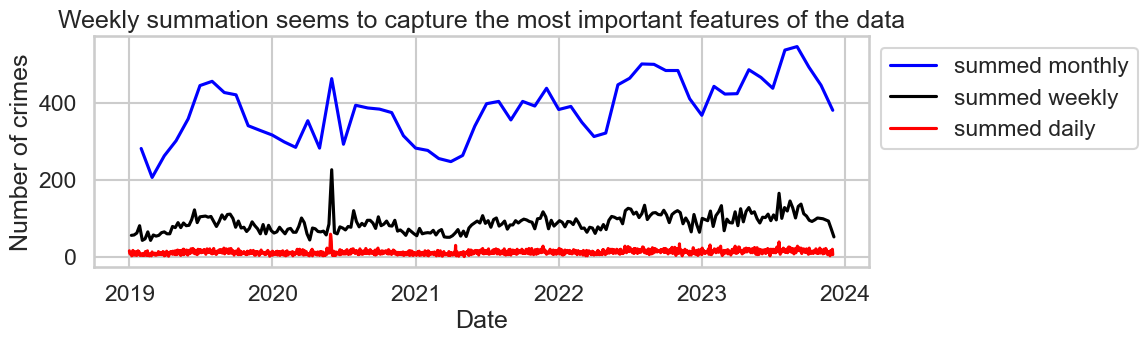

In [47]:
# Resampled crime numbers (daily, weekly, monthly)
df_hs_subset['Date'] = pd.to_datetime(df_hs_subset['Occurred_Date'])  # Ensure Date is in datetime format
df_hs_subset.set_index('Date', inplace=True)
# create figure and axes object for 
fig,ax = plt.subplots(figsize=(10,3))
# Resample data by month and plot
# Resample your data to monthly and calculate size
monthly_crimedata = df_hs_subset['Crime_Count'].resample('M').sum()
weekly_crimedata = df_hs_subset['Crime_Count'].resample('W').sum()
daily_crimedata = df_hs_subset['Crime_Count'].resample('D').sum()
linemonth = plt.plot(monthly_crimedata,color='b')
lineweek = plt.plot(weekly_crimedata,color='k') # series plotting (index is date)
lineday = plt.plot(daily_crimedata,color='r')

plt.title('Weekly summation seems to capture the most important features of the data')
plt.xlabel('Date')
plt.ylabel('Number of crimes')
labeltext = ['summed monthly','summed weekly','summed daily']
leg = plt.legend(labels=labeltext,loc='upper left',bbox_to_anchor=(1,1))
plt.tight_layout

# Seasonal Decompoisition

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/3607494063.py:26: UserWarning:

The figure layout has changed to tight



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


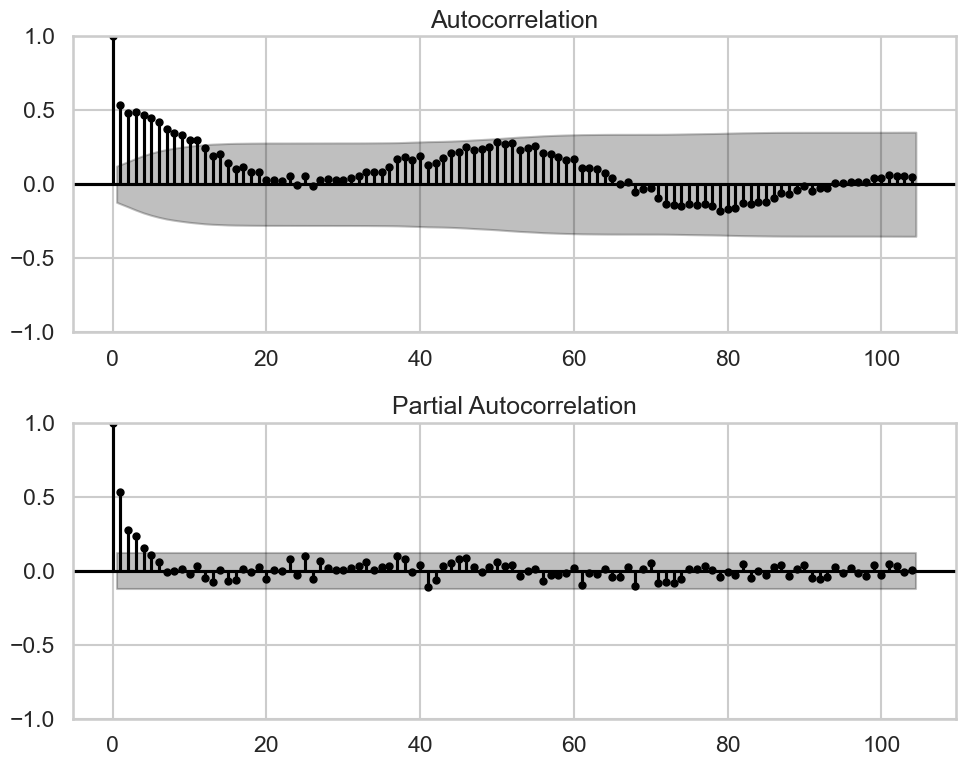

In [48]:
# Define date range for xlim
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-11-30')

figacf,axac = plt.subplots(2,1,figsize=(10, 8))
# Looking at data for about ~2 years
acf_plot = plot_acf(weekly_crimedata, lags=104,ax=axac[0])

# Access the stem lines (LineCollection) and change their color
for stem_line in axac[0].collections:  # collections contains the stem lines
    stem_line.set_color('k')
# Access the markers and change their color
for marker in axac[0].get_lines():  # get_lines contains the markers
    marker.set_color('k')
plt.tight_layout()
# pacf
# Looking at data for about ~2 years
pacf_plot = plot_pacf(weekly_crimedata, lags=104,ax=axac[1])

# Access the stem lines (LineCollection) and change their color
for stem_line in axac[1].collections:  # collections contains the stem lines
    stem_line.set_color('k')
# Access the markers and change their color
for marker in axac[1].get_lines():  # get_lines contains the markers
    marker.set_color('k')
plt.tight_layout()
# Augmented Dickey Fuller test for stationarity
adf_result = adfuller(weekly_crimedata)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/624491012.py:14: UserWarning:

The figure layout has changed to tight

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_91676/624491012.py:20: UserWarning:

The figure layout has changed to tight



Text(0.02, 0.5, 'Number of crimes (weekly)')

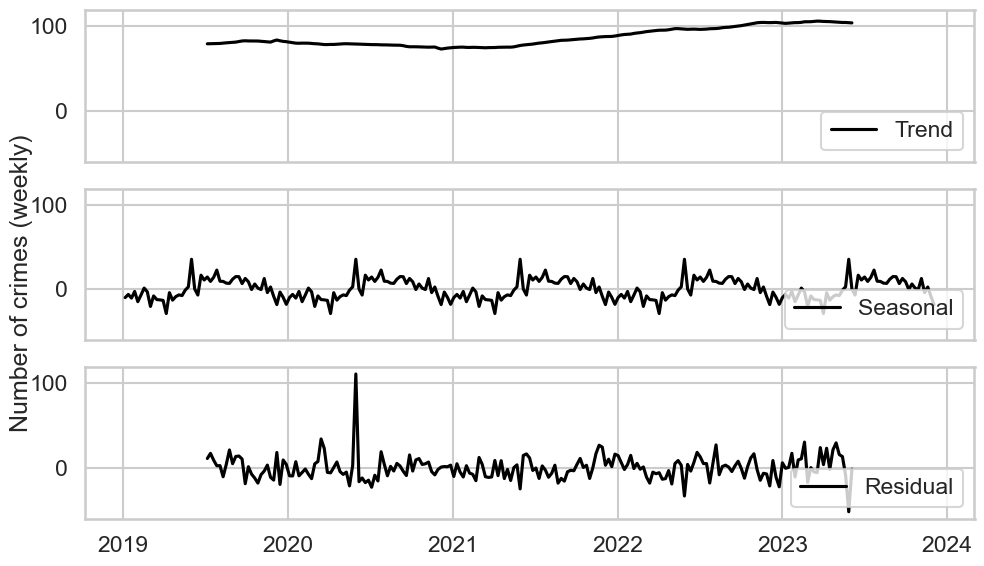

In [49]:
# Decompose time series
decompresult = seasonal_decompose(weekly_crimedata, model='additive')
# Plot data
fig2,ax = plt.subplots(3,1,figsize=(10, 6),sharex=True)
# Plotting the trend
ax[0].plot(decompresult.trend, label='Trend',color='k')
ax[0].legend(loc='lower right')
plt.tight_layout()

# Plotting the Seasonal
# ax2 = plt.subplot(312)
ax[1].plot(decompresult.seasonal, label='Seasonal',color='k')
ax[1].legend(loc='lower right')
plt.tight_layout()

# Plotting the Residual
# ax3 = plt.subplot(313) 
ax[2].plot(decompresult.resid, label='Residual',color='k')
ax[2].legend(loc='lower right')
plt.tight_layout()

# Automatically adjust y-axis limits based on the plotted data
ymins = []
ymaxs = []

# Collect limits from all subplots
for axobj in ax:
    ymin, ymax = axobj.get_ylim()
    ymins.append(ymin)
    ymaxs.append(ymax)

# Determine global minimum and maximum
global_ymin = min(ymins)
global_ymax = max(ymaxs)

# Set the global limits to all subplots
for axobj in ax:
    axobj.set_ylim(global_ymin, global_ymax)

# make a text object centered at the middle of the figure
fig2.text(0.02, 0.5, 'Number of crimes (weekly)', ha='center', va='center', rotation='vertical')


The autocorrelation for the first few lags is positive, indicating that a substantial amount of reported crime tends to be clustered close together in time (i.e. crime one week is predictive of crime the next week). 

The trend shows a clear increase in crime following police budget cuts that passed in December 2020. A large spike in mid-2020 is evident in the residual, indicating the sharp temporary increase in crime during the protests after George Floyd was killed on 25 May 2020. Subseqeuntly, changes in policing in practice as well as other factors may explain spikes in crime throughout the years that are not fully captured by seasonality. That said, our residuals are relatively small when we analyze the time series data on a weekly basis (this is not the case for monthly sampling, suggesting that monthly sampling is too slow for the information of interest).

The ADF Statistic and p-value indicate that the data do not have a unit root (which we can interpret as the signals being stationary).
 


There is some visual evidence of both seasonal and trend components in our dataset which is corroborate by the ACF and PACF plots, although the data are stationary according to the ADF test. It seems prudent to incorporate both into our model. 

In [50]:
# Define SARIMA parameters (example values)
p, d, q = 1, 0, 2
P, D, Q, s = 1, 0, 1, 26 

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(weekly_crimedata,
                                         order=(p, d, q),
                                         seasonal_order=(P, D, Q, s),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
# Fit data to model
sarima_result = sarima_model.fit()

# Model summary
print(sarima_result.summary())



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96178D+00    |proj g|=  4.83678D-01

At iterate    5    f=  3.88656D+00    |proj g|=  1.70612D-01

At iterate   10    f=  3.86863D+00    |proj g|=  7.61426D-02

At iterate   15    f=  3.86161D+00    |proj g|=  1.69670D-01

At iterate   20    f=  3.84192D+00    |proj g|=  7.73542D-01

At iterate   25    f=  3.82830D+00    |proj g|=  5.31637D-02

At iterate   30    f=  3.82814D+00    |proj g|=  9.86537D-04

At iterate   35    f=  3.82813D+00    |proj g|=  5.89392D-02

At iterate   40    f=  3.82806D+00    |proj g|=  4.12373D-03

At iterate   45    f=  3.82806D+00    |proj g|=  5.92437D-03


/Users/M118684/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  3.82806D+00    |proj g|=  8.82078D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   8.821D-03   3.828D+00
  F =   3.8280551584755598     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                                      SARIMAX Results                                       
Dep. Variable:    

In [51]:
# Forecasting future values
forecast = sarima_result.get_forecast(steps=12)  # Forecasting the next 12 steps
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()  # Confidence intervals

# Linear Regression

In [98]:
# DAILY PREDICTIONS
df_daily_crime = pd.DataFrame(daily_crimedata)
# df_daily_crime.merge(right=msp_weather,left_)
df_daily_crime['Lagged_Crime_Count'] = df_daily_crime['Crime_Count'].shift(1)
df_daily_crime['Rolling_Weekly_Mean'] = df_daily_crime['Crime_Count'].rolling(window=7).mean()
df_daily_crime['Day_of_Week'] = df_daily_crime.index.dayofweek
df_daily_crime['Month'] = df_daily_crime.index.month
df_daily_crime.dropna(inplace=True)
# Merge weather data on date and clean up data
# df_daily_crime.merge(right=msp_weather,left_index=True,right_on='Date')
df_daily_crime_merge = pd.merge(left=df_daily_crime,right=msp_weather,left_index=True,right_on='Date')
# df_daily_crime_merge.drop('Date',axis=1,inplace=True)
weathercols = ['Precipitation (inches)','Snow (inches)','Snow Depth (inches)']
# fill NA
df_daily_crime_merge.replace("T",np.NaN,inplace=True)
# df_daily_crime_merge[weathercols] = df_daily_crime_merge[weathercols].fillna(method='ffill')
df_daily_crime_merge.set_index('Date',inplace=True)
df_daily_crime_merge['Precipitation (inches)'] = df_daily_crime_merge['Precipitation (inches)'].fillna(method='ffill').astype(float)
df_daily_crime_merge['Snow (inches)'] = df_daily_crime_merge['Snow (inches)'].fillna(method='ffill').astype(float)
df_daily_crime_merge['Snow Depth (inches)'] = df_daily_crime_merge['Snow Depth (inches)'].fillna(method='ffill').astype(float)
# Are there ANY NaN values left?
df_daily_crime_merge.isna().any()
# Yes. In the Snow Depth column. Let's fill these with 0
df_daily_crime_merge['Snow Depth (inches)'].fillna(0, inplace=True)

# Calculate the correlation matrix
corr_matrix = df_daily_crime_merge.corr()
# Get the absolute correlation values with 'Crime_Count'
corr_with_target = corr_matrix['Crime_Count'].abs()
# Filter variables with correlation above the arbitrary threshold
vars_with_predpower = corr_with_target[corr_with_target > 0.25].index.tolist()
df_daily_crime_merge = df_daily_crime_merge[vars_with_predpower]
df_daily_crime_merge

,Crime_Count,Lagged_Crime_Count,Rolling_Weekly_Mean,Max Temp (F),Min Temp (F)
Date,,,,,
2019-01-07 00:00:00+00:00,3,9.0,8.428571,42.0,34.0
2019-01-08 00:00:00+00:00,9,3.0,7.428571,38.0,11.0
2019-01-09 00:00:00+00:00,7,9.0,7.142857,16.0,6.0
2019-01-10 00:00:00+00:00,17,7.0,8.428571,24.0,10.0
2019-01-11 00:00:00+00:00,9,17.0,8.714286,33.0,18.0
...,...,...,...,...,...
2023-11-26 00:00:00+00:00,8,12.0,10.428571,34.0,21.0
2023-11-27 00:00:00+00:00,14,8.0,10.571429,21.0,12.0
2023-11-28 00:00:00+00:00,12,14.0,10.857143,32.0,8.0


In [100]:
# Split the data based on the year
train = df_daily_crime_merge[df_daily_crime_merge.index.year < 2023]
test = df_daily_crime_merge[df_daily_crime_merge.index.year == 2023]

# Separate features and target variable for training and testing sets
# 'Crime_Count' is the target variable; everything else can be used for training
X_train = train.drop('Crime_Count', axis=1)
y_train = train['Crime_Count']
X_test = test.drop('Crime_Count', axis=1)
y_test = test['Crime_Count']

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse: .2f}")
print(f"Mean Absolute Error: {mae: .2f}")
print(f"R-squared (R^2) Score: {r2: .2f}")

# Plotting the actual vs predicted values
# Create traces
trace1 = go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines+markers',
    name='Actual',
    marker=dict(color='blue',size=10),
    line=dict(width=2)
    
)

trace2 = go.Scatter(
    x=y_test.index,
    y=predictions,
    mode='lines+markers',
    name='Predicted',
    marker=dict(color='red'),
    line=dict(width=1)
)

# Create the figure
fig = go.Figure(data=[trace1, trace2])

# Update layout
fig.update_layout(
    title='Actual vs Predicted Numbers of Crime Throughout 2023',
    xaxis_title='Date',
    yaxis_title='Number of Crimes',
    legend_title='Legend',
    template="plotly"
)

# Show the figure
fig.show()

Mean Squared Error:  19.68
Mean Absolute Error:  3.49
R-squared (R^2) Score:  0.20


Notably, the MSE is ~20, which is large given that we are attempting to detect changes in daily crime. Visually, our model seems to underestimate crime consistently (almost as if it's a low-pass version of the data). Perhaps the daily fluctuations are just too fast for our model to detct. The model only explains about 20% of the overall variability and thus lacks real predictive power. 

Mean Squared Error:  0.00
Mean Absolute Error:  0.00
R-squared (R^2) Score:  1.00


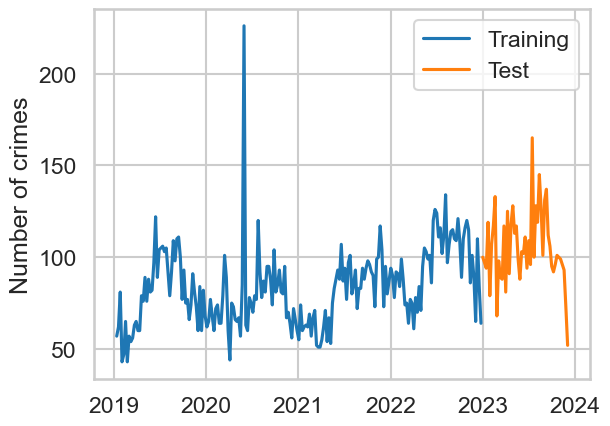

In [101]:
# WEEKLY PREDICTIONS
df_weekly_crime = pd.DataFrame(weekly_crimedata)
# df_daily_crime.merge(right=msp_weather,left_)
df_weekly_crime['Lagged_Crime_Count'] = df_weekly_crime['Crime_Count'].shift(1)
# Bi-weekly rolling mean
df_weekly_crime['Rolling_BiWeekly_Mean'] = df_weekly_crime['Crime_Count'].rolling(window=2).mean()
df_weekly_crime['Month'] = df_weekly_crime.index.month
df_weekly_crime.dropna(inplace=True)
df_weekly_crime

# Merge weather data on date and clean up data
# df_daily_crime.merge(right=msp_weather,left_index=True,right_on='Date')
df_weekly_crime_merge = pd.merge(left=df_weekly_crime,right=msp_weather,left_index=True,right_on='Date')
# df_daily_crime_merge.drop('Date',axis=1,inplace=True)
weathercols = ['Precipitation (inches)','Snow (inches)','Snow Depth (inches)']
# fill NA
df_weekly_crime_merge.replace("T",np.NaN,inplace=True)
# df_daily_crime_merge[weathercols] = df_daily_crime_merge[weathercols].fillna(method='ffill')
df_weekly_crime_merge.set_index('Date',inplace=True)
df_weekly_crime_merge['Precipitation (inches)'] = df_weekly_crime_merge['Precipitation (inches)'].fillna(method='ffill').astype(float)
df_weekly_crime_merge['Snow (inches)'] = df_weekly_crime_merge['Snow (inches)'].fillna(method='ffill').astype(float)
df_daily_crime_merge['Snow Depth (inches)'] = df_weekly_crime_merge['Snow Depth (inches)'].fillna(method='ffill').astype(float)
# Are there ANY NaN values left?
df_weekly_crime_merge.isna().any()
# Yes. In the Snow Depth column. Let's fill these with 0
df_weekly_crime_merge['Snow Depth (inches)'].fillna(0, inplace=True)
# Calculate the correlation matrix
corr_matrix = df_weekly_crime_merge.corr()
# Get the absolute correlation values with 'Crime_Count'
corr_with_target = corr_matrix['Crime_Count'].abs()
# Filter variables with correlation above the arbitrary threshold
vars_with_predpower = corr_with_target[corr_with_target > 0.4].index.tolist()
df_weekly_crime_merge = df_weekly_crime_merge[vars_with_predpower]

# Split the data based on the year
train = df_weekly_crime_merge[df_weekly_crime_merge.index.year < 2023]
test = df_weekly_crime_merge[df_weekly_crime_merge.index.year == 2023]

plt.plot(train.index,train['Crime_Count'])
plt.plot(test.index,test['Crime_Count'])
plt.legend(['Training','Test'])
plt.ylabel('Number of crimes')

# Separate features and target variable for training and testing sets
# 'Crime_Count' is the target variable; everything else can be used for training
X_train = train.drop('Crime_Count', axis=1)
y_train = train['Crime_Count']
X_test = test.drop('Crime_Count', axis=1)
y_test = test['Crime_Count']

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse: .2f}")
print(f"Mean Absolute Error: {mae: .2f}")
print(f"R-squared (R^2) Score: {r2: .2f}")


In [102]:

# Plotting the actual vs predicted values
# Create traces
trace1 = go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines+markers',
    name='Actual',
    marker=dict(color='blue',size=10),
    line=dict(width=2)
)

trace2 = go.Scatter(
    x=y_test.index,
    y=predictions,
    mode='lines+markers',
    name='Predicted',
    marker=dict(color='red'),
    line=dict(width=1)
)

# Create the figure
fig = go.Figure(data=[trace1, trace2])

# Update layout
fig.update_layout(
    title='Actual vs Predicted Numbers of Crime Throughout 2023',
    xaxis_title='Date',
    yaxis_title='Number of Crimes',
    legend_title='Legend',
    template="plotly"
)

# Show the figure
fig.show()

# Alternative Model: K-Nearest Neighbors

In [230]:
# Initialize the KNN regressor
# n_neighbors should be tuned;
knn_model = KNeighborsRegressor(n_neighbors=1)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_model.predict(X_test)

# Evaluate the model (you can use MSE, MAE, R² as before)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Display the metrics
print(f"KNN Mean Squared Error (MSE): {knn_mse:.2f}")
print(f"KNN R-squared (R²) Score: {knn_r2:.2f}")

# Plotting the actual vs predicted values
# Create traces
trace1 = go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines+markers',
    name='Actual',
    marker=dict(color='blue')
)

trace2 = go.Scatter(
    x=y_test.index,
    y=predictions,
    mode='lines+markers',
    name='Predicted',
    marker=dict(color='red')
)

# Create the figure
fig = go.Figure(data=[trace1, trace2])

# Update layout
fig.update_layout(
    title='Actual vs KNN Predicted Numbers of Crime Throughout 2023',
    xaxis_title='Date',
    yaxis_title='Number of Crimes',
    legend_title='Legend',
    template="plotly"
)

# Show the figure
fig.show()

KNN Mean Squared Error (MSE): 46.81
KNN R-squared (R²) Score: -0.90


In [224]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=3)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"Random Forest Regressor R^2: {rf_r2}")


Random Forest Regressor MSE: 46.26468128557699
Random Forest Regressor R^2: -0.8811151555939654
